In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics,neighbors
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import os
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train['Gender'] = 0
df_train['Gender'][(df_train['Sex']=='male')] = '0'
df_train['Gender'][(df_train['Sex']=='female')] = '1'
df_train=df_train.drop(['Sex'],axis=1)
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0


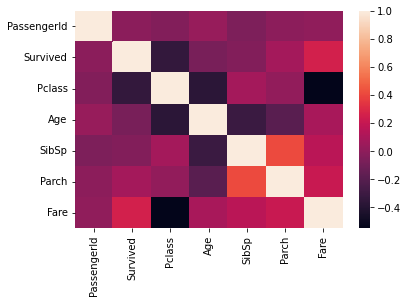

In [6]:
import seaborn as sns
corr = df_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [7]:
df_train.dropna(subset=['Gender','Age','SibSp','Parch','Survived'], inplace = True) #Drop the columns with null value

In [8]:
x_train=df_train[['Gender','Age','SibSp','Parch']] #Define input of train set
y_train = df_train[['Survived']] #Output of train set


In [9]:
datatest1=pd.read_csv('gender_submission.csv')
df_test = pd.read_csv('test.csv')
df_test=pd.merge(df_test,datatest1,on='PassengerId',how='inner')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [10]:
df_test['Gender'] = 0
df_test['Gender'][(df_test['Sex']=='male')] = '0'
df_test['Gender'][(df_test['Sex']=='female')] = '1'
df_test=df_test.drop(['Sex'],axis=1)
df_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Gender
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,S,0,0


In [11]:
#df_test.dropna(subset=['Gender','Age','SibSp','Parch','Survived'], inplace = True)

In [12]:
x_test=df_test[['Gender','Age','SibSp','Parch']]#Define input of test set
y_test = df_test[['Survived']] #Output of test set

In [13]:
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [14]:
#Scale the date before training

y_train=np.reshape(y_train, (-1,1))
y_test=np.reshape(y_test, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x_train))
xtrain_scale=scaler_x.transform(x_train)
print(scaler_x.fit(x_test))
xtest_scale=scaler_x.transform(x_test)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [15]:
xtest_scale

array([[0.        , 0.4527232 , 0.        , 0.        ],
       [1.        , 0.61756561, 0.125     , 0.        ],
       [0.        , 0.8153765 , 0.        , 0.        ],
       ...,
       [0.        , 0.50547277, 0.        , 0.        ],
       [0.        ,        nan, 0.        , 0.        ],
       [0.        ,        nan, 0.125     , 0.11111111]])

In [16]:
model = Sequential()
model.add(Dense(30, input_dim=4, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(20,  activation='relu', kernel_initializer='he_normal'))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation='softmax'))


In [17]:

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics= ['accuracy'])

In [18]:
#Fit the model to the train set
model.fit(xtrain_scale, ytrain_scale, epochs=70, batch_size=16, verbose=2,validation_split = 0.1)

Epoch 1/70
41/41 - 1s - loss: 0.6131 - accuracy: 0.7664 - val_loss: 0.5554 - val_accuracy: 0.7639 - 1s/epoch - 27ms/step
Epoch 2/70
41/41 - 0s - loss: 0.5439 - accuracy: 0.7664 - val_loss: 0.4933 - val_accuracy: 0.8056 - 87ms/epoch - 2ms/step
Epoch 3/70
41/41 - 0s - loss: 0.5256 - accuracy: 0.7773 - val_loss: 0.4675 - val_accuracy: 0.8056 - 89ms/epoch - 2ms/step
Epoch 4/70
41/41 - 0s - loss: 0.5203 - accuracy: 0.7773 - val_loss: 0.4666 - val_accuracy: 0.8056 - 93ms/epoch - 2ms/step
Epoch 5/70
41/41 - 0s - loss: 0.5151 - accuracy: 0.7773 - val_loss: 0.4562 - val_accuracy: 0.8056 - 86ms/epoch - 2ms/step
Epoch 6/70
41/41 - 0s - loss: 0.5118 - accuracy: 0.7804 - val_loss: 0.4509 - val_accuracy: 0.8194 - 112ms/epoch - 3ms/step
Epoch 7/70
41/41 - 0s - loss: 0.5105 - accuracy: 0.7866 - val_loss: 0.4450 - val_accuracy: 0.8333 - 89ms/epoch - 2ms/step
Epoch 8/70
41/41 - 0s - loss: 0.5095 - accuracy: 0.7913 - val_loss: 0.4403 - val_accuracy: 0.8472 - 85ms/epoch - 2ms/step
Epoch 9/70
41/41 - 0s - 

In [19]:
model.evaluate(xtest_scale, ytest_scale) # Evaluate the model on the unseen test data

14/14 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9091


[nan, 0.9090909361839294]

In [20]:
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [21]:
x_test

,Gender,Age,SibSp,Parch
0,0,34.5,0,0
1,1,47.0,1,0
2,0,62.0,0,0
3,0,27.0,0,0
4,1,22.0,1,1
...,...,...,...,...
413,0,NaN,0,0
414,1,39.0,0,0
415,0,38.5,0,0
416,0,NaN,0,0


In [22]:
pred = model.predict(xtest_scale)

In [23]:
df_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Gender
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,S,0,0


In [24]:
Final_output = np.argmax(pred, axis = 1)

In [25]:
df_test['Survived'] = Final_output

In [ ]:
df_test_final = df_test[['PassengerId','Survived' ]]

In [ ]:
df_test_final

In [ ]:
df_test_final.to_csv('/kaggle/working/submission.csv', index=False)